In [532]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
#%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [533]:
#Read in the csv file and convert to a Pandas dataframe
df_2015=pd.read_csv("Data/2015.csv")
df_2016=pd.read_csv("Data/2016.csv")
df_2017=pd.read_csv("Data/2017.csv")
df_2018=pd.read_csv("Data/2018.csv")
df_2019=pd.read_csv("Data/2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [534]:
df_2015.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [535]:
def calc_happiness(df_any,country):
    country=df_any[df_any['Country']==country]
    happiness_score = (
        country["Economy (GDP per Capita)"] +
        country["Family"] +
        country["Health (Life Expectancy)"] +
        country["Freedom"] +
        country["Trust (Government Corruption)"] +
        country["Generosity"] +
        country["Dystopia Residual"]
    )
    return happiness_score


In [536]:
calc_happiness(df_2015,'Switzerland')

0    7.58696
dtype: float64

In [537]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [538]:
calc_happiness(df_2016,'Switzerland')

1    7.50866
dtype: float64

In [539]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [540]:
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [541]:
calc_happiness(df_2017,'Switzerland')


KeyError: 'Economy (GDP per Capita)'

In [ ]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df_2015.size,df_2016.size,df_2017.size,df_2018.size,df_2019.size

(1896, 2041, 1860, 1404, 1404)

In [ ]:
df_2015.shape,df_2016.shape,df_2017.shape,df_2018.shape,df_2019.shape

((158, 12), (157, 13), (155, 12), (156, 9), (156, 9))

In [ ]:
# after i get a view on the data structure and try to listen and feel the data ,i think all the yaers have slightly diffrent like 2015 and 2016, 2016 have two more columns than the 2015 but 2015 have the (Standard Error) culomn 
# and for the 2017 have (Whisker.high) (Whisker.low) columns and i do not no what is mean for now 
# and for the 2018 and the 2019 have same columns thay have (Social support) column
# and the Happiness Score is sum of all factors

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [ ]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [ ]:
df_2015.describe(include="object").T

,count,unique,top,freq
Country,158,158,Switzerland,1
Region,158,10,Sub-Saharan Africa,40


In [ ]:
df_2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


In [ ]:
df_2016.describe(include="object").T

,count,unique,top,freq
Country,157,157,Denmark,1
Region,157,10,Sub-Saharan Africa,38


In [ ]:
df_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


In [ ]:
df_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
GDP per capita,156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096
Social support,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644
Healthy life expectancy,156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030
Freedom to make life choices,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724
Generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598
Perceptions of corruption,155.0,0.112000,0.096492,0.000,0.05100,0.0820,0.13700,0.457


In [ ]:
df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# from the kaggle page mentioned that take it from Gallup World Poll website and it is reliable

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# the data it is up-to-date for our problem ,it is from 2015 to 2019 ,and know there is a data from 2020 to 2024 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
# we must compare the data with other data source like World Bank or UN databases.
# check data should be in the same way for the years 
# we found the yaer that 2018 and 2019 have missing column (Dystopia.Residual)

In [ ]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
df_2017.rename(columns={"Happiness.Rank":"Happiness Rank",
                        "Happiness.Score":"Happiness Score",
                        "Economy..GDP.per.Capita.":"Economy (GDP per Capita)",
                        "Health..Life.Expectancy.":"Health (Life Expectancy)",
                        "Trust..Government.Corruption.":"Trust (Government Corruption)",
                        "Dystopia.Residual":"Dystopia Residual"},inplace=True)

In [ ]:
df_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
df_2018.rename(columns={"Overall rank":"Happiness Rank",
                        "Country or region":"Country",
                        "Score":"Happiness Score",
                        "GDP per capita":"Economy (GDP per Capita)",
                        "Social support":"Family",
                        "Healthy life expectancy":"Health (Life Expectancy)",
                        "Freedom to make life choices":"Freedom",
                        "Perceptions of corruption":"Trust (Government Corruption)"},inplace=True)

In [ ]:
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
df_2019.rename(columns={"Overall rank":"Happiness Rank",
                        "Country or region":"Country",
                        "Score":"Happiness Score",
                        "GDP per capita":"Economy (GDP per Capita)",
                        "Social support":"Family",
                        "Healthy life expectancy":"Health (Life Expectancy)",
                        "Freedom to make life choices":"Freedom",
                        "Perceptions of corruption":"Trust (Government Corruption)"},inplace=True)

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# the sample is good for our problem and show me that what i need for the  answers

In [ ]:
# maybe we need to drop the (Standard Error) column because it is not in the other years	
	
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
# maybe we need to drop the (Lower Confidence Interval),(Upper Confidence Interval) column because it is not in the other years	
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
# maybe we need to drop the (Whisker.high),(Whisker.low) column because it is not in the other years	
df_2017.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [ ]:
# i think we do not have the Dystopia Residual becuse it is important for the Happiness Score	
df_2018.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
# i think we do not have the Dystopia Residual becuse it is important for the Happiness Score	
df_2019.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [ ]:
df_2015.duplicated().sum()

0

In [ ]:
df_2016.duplicated().sum()

0

In [ ]:
df_2017.duplicated().sum()

0

In [ ]:
df_2018.duplicated().sum()

0

In [ ]:
df_2019.duplicated().sum()

0

In [ ]:
#there is no duplicat in the data 

In [ ]:
df_2015[df_2015.duplicated('Happiness Rank',keep=False)]

# thay have the same rank because thay have Happiness Score	

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


In [ ]:
df_2016[df_2016.duplicated('Happiness Rank',keep=False)]

# thay have the same rank because thay have Happiness Score	


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
33,Saudi Arabia,Middle East and Northern Africa,34,6.379,6.287,6.471,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457,2.61482
34,Taiwan,Eastern Asia,34,6.379,6.305,6.453,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523
56,Poland,Central and Eastern Europe,57,5.835,5.749,5.921,1.24585,1.04685,0.69058,0.45190,0.05500,0.14443,2.20035
57,South Korea,Eastern Asia,57,5.835,5.747,5.923,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824,2.35015
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
145,Uganda,Sub-Saharan Africa,145,3.739,3.629,3.849,0.34719,0.90981,0.19625,0.43653,0.06442,0.27102,1.51416


In [ ]:
df_2017[df_2017.duplicated('Happiness.Rank',keep=False)]

# here if there is a same Happiness Score will not have same rank 

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


In [ ]:
df_2018[df_2018.duplicated('Overall rank',keep=False)]

# here if there is a same Happiness Score will not have same rank 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [ ]:
df_2019[df_2019.duplicated('Overall rank',keep=False)]

# here they have the same Happiness Score but the Happiness Rank is different

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [ ]:
 # so i think the data are unique 

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [ ]:
df_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
(df_2015==0).sum()
# we have values that have a 0 in the data and i think it is ok because i try to calculate the Happiness Score 
#and i get the same result so maybe thay do not have a value for this factor or maybe this the real value

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [ ]:
df_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
(df_2016==0).sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [ ]:
df_2017.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64

In [ ]:
(df_2017==0).sum()


Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Generosity                       1
Trust (Government Corruption)    1
Dystopia Residual                0
dtype: int64

In [ ]:
df_2017[df_2017['Generosity']==0]

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
86,Greece,87,5.227,5.325246,5.128754,1.289487,1.239415,0.810199,0.095731,0.0,0.04329,1.749222


In [ ]:
df_2018.isnull().sum()
 
# we have only one null value in the column (Perceptions of corruption) 

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    1
dtype: int64

In [ ]:
df_2018[df_2018['Trust (Government Corruption)'].isnull()]


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [ ]:
(df_2018==0).sum()



Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Generosity                       1
Trust (Government Corruption)    2
dtype: int64

In [ ]:
df_2019.isnull().sum()

In [ ]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [ ]:
# check columns types 

In [ ]:
df_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
df_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
df_2017.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

In [ ]:
df_2018.dtypes

Happiness Rank                     int64
Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

In [ ]:
df_2019.dtypes

Happiness Rank                     int64
Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

In [ ]:
# i think all the data sources columns in the right format and values

In [ ]:
# go to clean them 

In [ ]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


### 2015

In [ ]:
(df_2015==0).sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [ ]:
df_2015[df_2015["Generosity"]==0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


In [ ]:
calc_happiness(df_2015,'Greece')


101    4.85749
dtype: float64

In [ ]:
# i checked all it was th 0 is the real value for that column

### 2016

In [ ]:
(df_2016==0).sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [ ]:
df_2016[df_2016["Generosity"]==0]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
98,Greece,Western Europe,99,5.033,4.935,5.131,1.24886,0.75473,0.80029,0.05822,0.04127,0.0,2.12944


In [ ]:
calc_happiness(df_2016,'Greece')

98    5.03281
dtype: float64

In [ ]:
# i checked all it was th 0 is the real value for that column

### 2017

In [ ]:
(df_2017==0).sum()


Country                          0
Happiness Rank                   0
Happiness Score                  0
Whisker.high                     0
Whisker.low                      0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Generosity                       1
Trust (Government Corruption)    1
Dystopia Residual                0
dtype: int64

In [ ]:
df_2017[df_2017["Generosity"]==0]

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
86,Greece,87,5.227,5.325246,5.128754,1.289487,1.239415,0.810199,0.095731,0.0,0.04329,1.749222


In [ ]:
calc_happiness(df_2017,'Greece')

86    5.227344
dtype: float64

In [ ]:
# i checked all it was th 0 is the real value for that column

### 2018

In [ ]:
df_2018['Trust (Government Corruption)']

0      0.393
1      0.340
2      0.408
3      0.138
4      0.357
       ...  
151    0.064
152    0.097
153    0.106
154    0.038
155    0.076
Name: Trust (Government Corruption), Length: 156, dtype: float64

In [ ]:
df_2018.isnull().sum()

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    1
dtype: int64

In [ ]:
df_2018.fillna(df_2018['Trust (Government Corruption)'].mean(),inplace=True)

In [ ]:
df_2018[df_2018['Country']=='United Arab Emirates']


,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,0.112


In [ ]:
df_2018.isnull().sum()

Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
dtype: int64

In [ ]:
# i fill the null value with the mean of the column because it is only one value and i think it is not affect the data

In [ ]:
df_2018.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [ ]:
df_2018["Dystopia Residual"] =df_2018["Happiness Score"]-(df_2018['Economy (GDP per Capita)']+
                                                              df_2018['Family']+
                                                              df_2018['Health (Life Expectancy)']+
                                                              df_2018['Freedom']+
                                                              df_2018['Generosity']+
                                                              df_2018['Trust (Government Corruption)'])

In [ ]:
df_2018.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318


In [ ]:
# i calculate the Dystopia Residual for 2018 maybe i need it and it was missing, from the previous years

In [ ]:
(df_2018==0).sum()


Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Generosity                       1
Trust (Government Corruption)    2
Dystopia Residual                0
dtype: int64

In [ ]:
df_2018[df_2018["Generosity"]==0]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
78,79,Greece,5.358,1.154,1.202,0.879,0.131,0.0,0.044,1.948


In [ ]:
calc_happiness(df_2018,'Greece')

78    5.358
dtype: float64

In [ ]:
# i checked all it was th 0 is the real value for that column

### 2019

In [ ]:
df_2019.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394


In [ ]:
df_2019["Dystopia Residual"] =df_2019["Happiness Score"]-(df_2019['Economy (GDP per Capita)']+
                                                              df_2019['Family']+
                                                              df_2019['Health (Life Expectancy)']+
                                                              df_2019['Freedom']+
                                                              df_2019['Generosity']+
                                                              df_2019['Trust (Government Corruption)'])

In [ ]:
df_2019.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394


In [ ]:
# i calculate the Dystopia Residual for 2019 maybe i need it and it was missing, from the previous years

In [ ]:
(df_2019==0).sum()


Happiness Rank                   0
Country                          0
Happiness Score                  0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Generosity                       1
Trust (Government Corruption)    1
Dystopia Residual                0
dtype: int64

In [ ]:
df_2019[df_2019["Generosity"]==0]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.0,0.034,1.85


In [ ]:
calc_happiness(df_2019,'Greece')

81    5.287
dtype: float64

In [ ]:
# i checked all it was th 0 is the real value for that column 

In [ ]:
# and i noticed it is 0 for same countries in the all years

In [ ]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# all the is in the right format 

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [ ]:
df_2015["Region"]

0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object

In [ ]:
counts_Region_2015=df_2015["Region"].value_counts()
counts_Region_2015

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83229/160223170.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[column].value_counts().index,


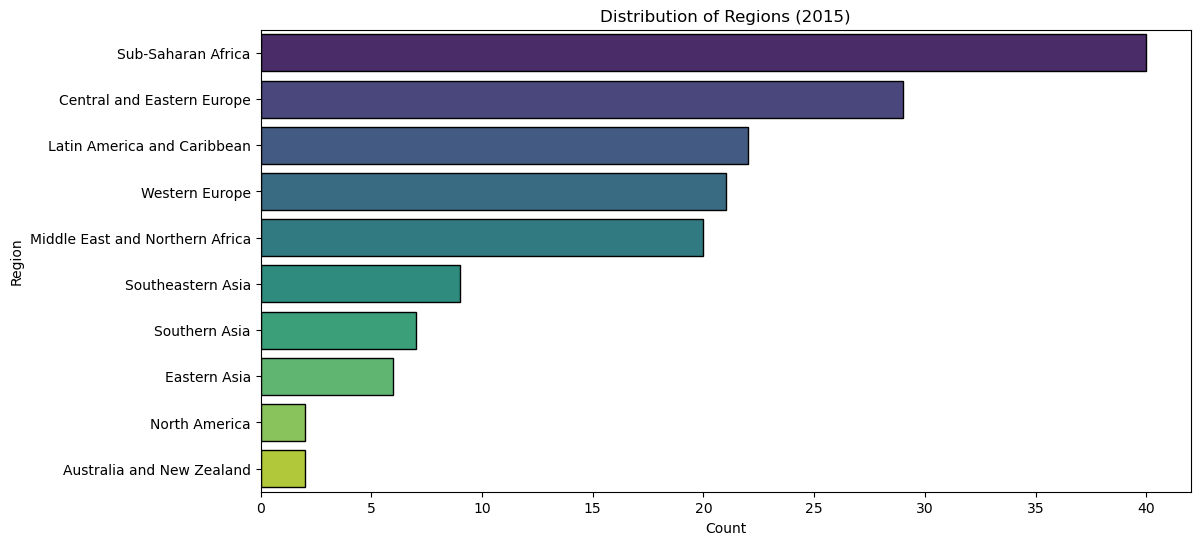

In [ ]:
# Function to plot bar chart with a color palette
def plot_bar_chart_with_palette(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(y=df[column].value_counts().index, 
                x=df[column].value_counts().values, 
                palette="viridis", edgecolor="black")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.title(title)
    plt.show()

plot_bar_chart_with_palette(df_2015, 'Region', 'Distribution of Regions (2015)')

#plot_bar_chart_with_palette(dfs['2016'], 'Region', 'Distribution of Regions (2016)')


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83229/160223170.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[column].value_counts().index,


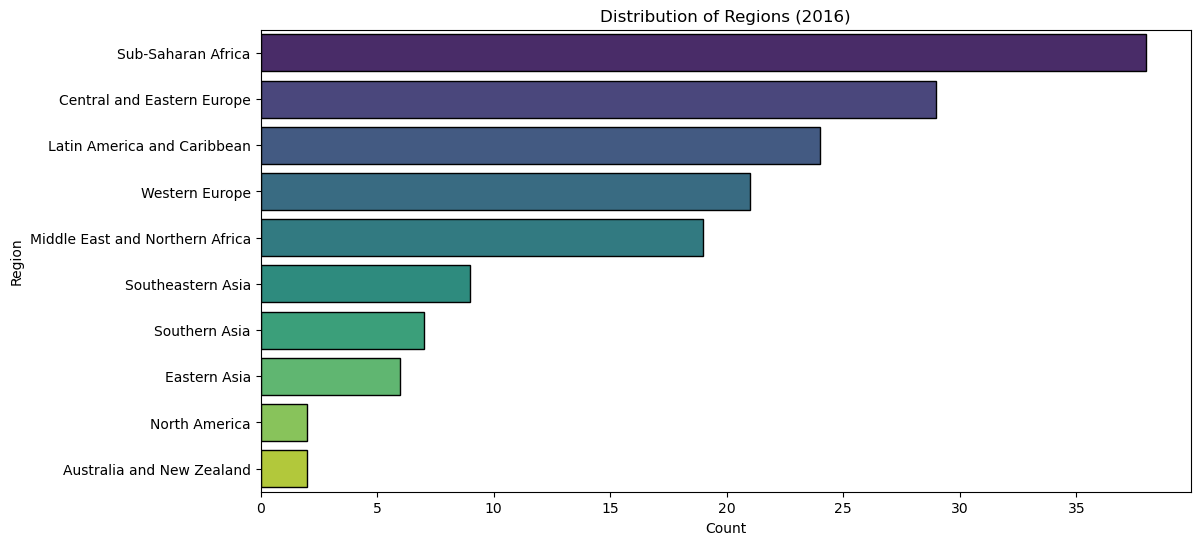

In [ ]:
plot_bar_chart_with_palette(df_2016, 'Region', 'Distribution of Regions (2016)')


In [ ]:
# there is slightly diffrent in the regions between 2015 and 2016 Litin America show more country  

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83229/1863386604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2015, x="Region", y="Happiness Score", palette="Set3")


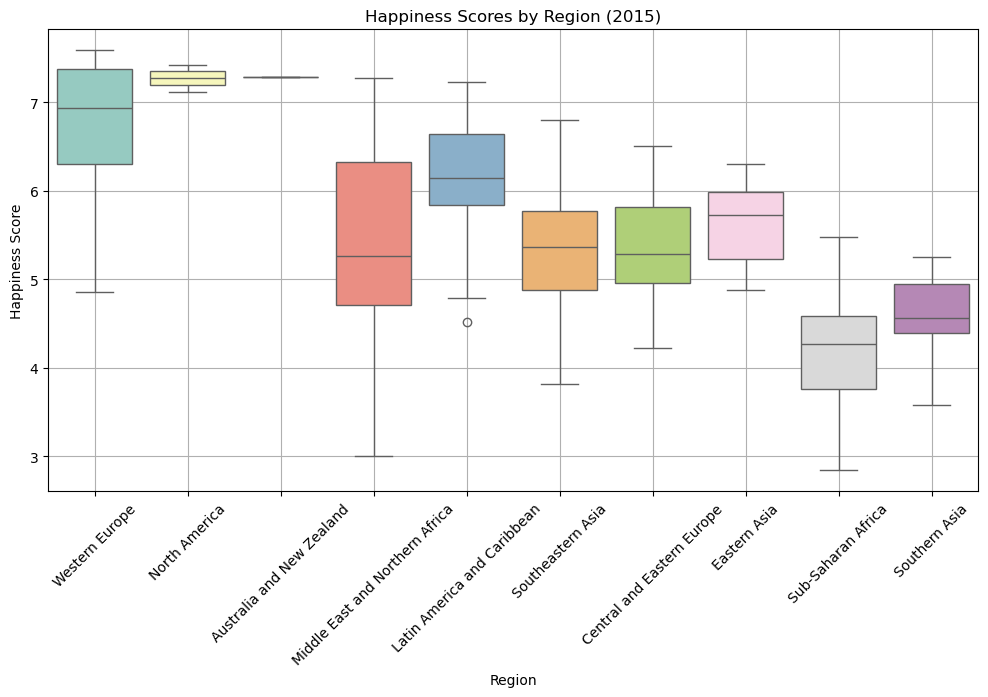

In [ ]:
# Boxplot of Happiness Scores by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2015, x="Region", y="Happiness Score", palette="Set3")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.title("Happiness Scores by Region (2015)")
plt.grid(True)
plt.show()

In [ ]:
df_2015[(df_2015["Region"] == "Latin America and Caribbean") & (df_2015["Happiness Score"] == 4.518)]


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
118,Haiti,Latin America and Caribbean,119,4.518,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83229/816546829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2016, x="Region", y="Happiness Score", palette="Set3")


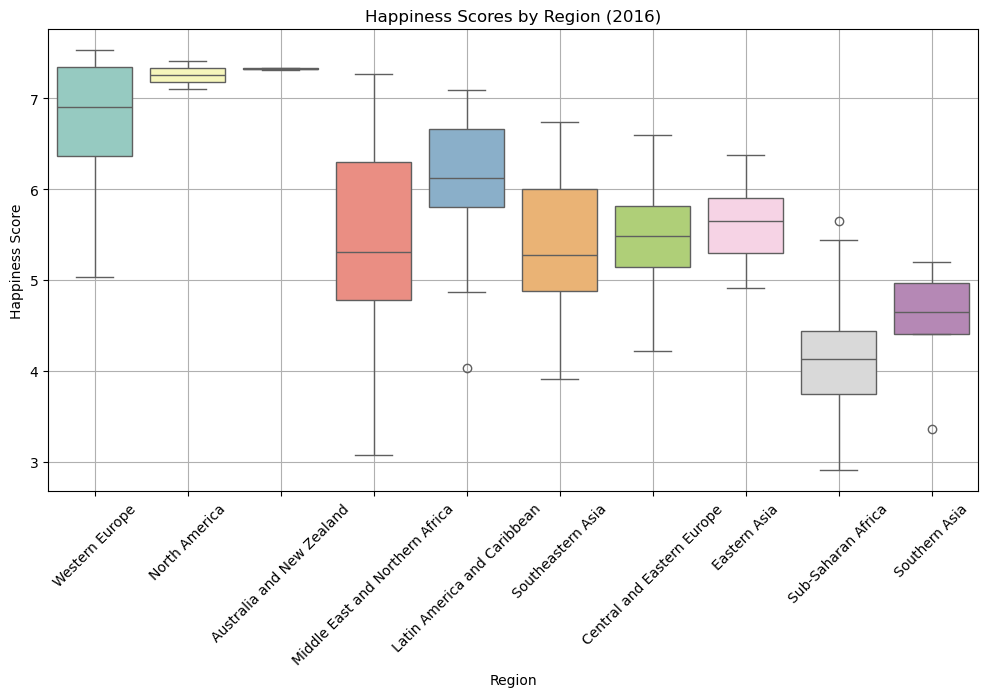

In [ ]:
# Boxplot of Happiness Scores by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2016, x="Region", y="Happiness Score", palette="Set3")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.title("Happiness Scores by Region (2016)")
plt.grid(True)
plt.show()

In [ ]:
def plot_histogram(df, column, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {title}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

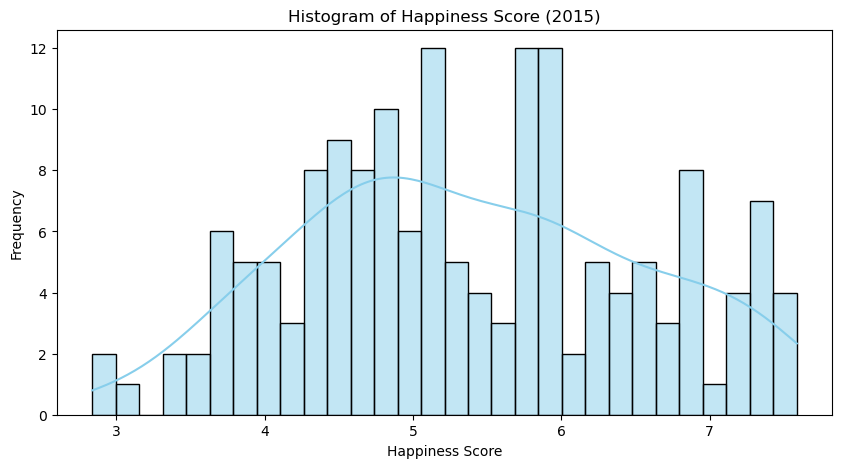

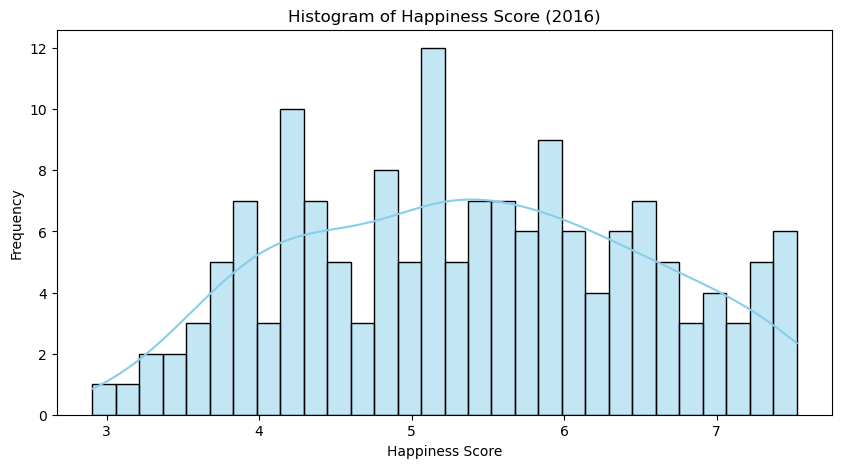

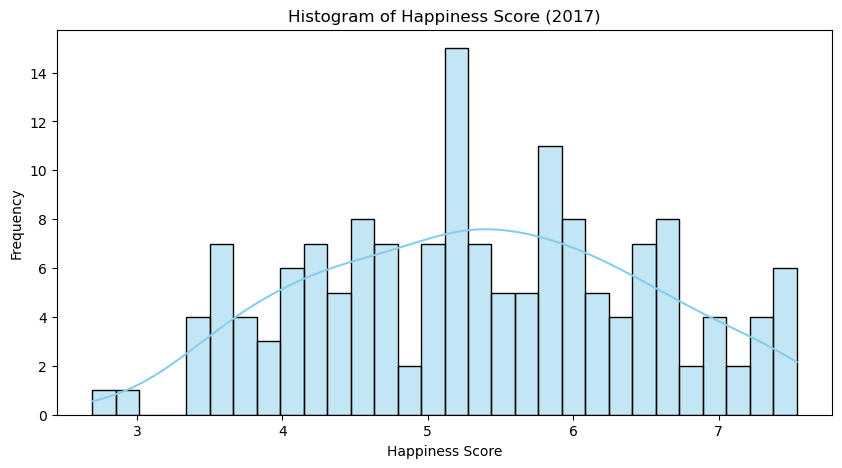

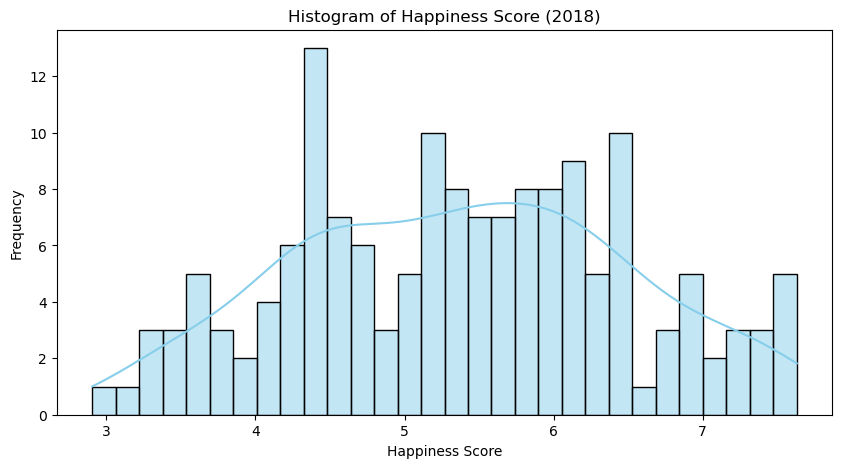

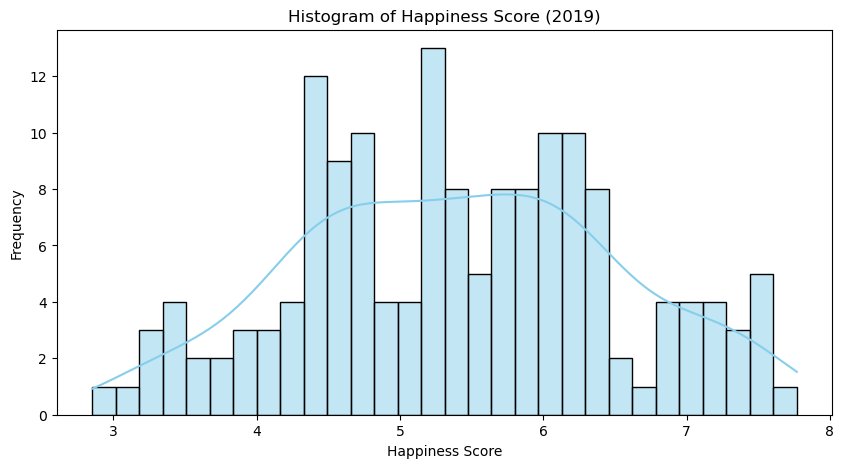

In [ ]:



plot_histogram(df_2015, "Happiness Score", "Happiness Score (2015)")
plot_histogram(df_2016, "Happiness Score", "Happiness Score (2016)")
plot_histogram(df_2017, "Happiness Score", "Happiness Score (2017)")
plot_histogram(df_2018, "Happiness Score", "Happiness Score (2018)")
plot_histogram(df_2019, "Happiness Score", "Happiness Score (2019)")

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [ ]:
df_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [ ]:
df_2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


In [ ]:
df_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy (GDP per Capita),155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health (Life Expectancy),155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust (Government Corruption),155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


In [ ]:
df_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Happiness Score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
Economy (GDP per Capita),156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096
Family,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644
Health (Life Expectancy),156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030
Freedom,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724
Generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598
Trust (Government Corruption),156.0,0.112000,0.096180,0.000,0.05100,0.0820,0.13650,0.457
Dystopia Residual,156.0,1.926372,0.518379,0.291,1.63525,1.9090,2.28575,2.961


In [ ]:
df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Happiness Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
Economy (GDP per Capita),156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Family,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Health (Life Expectancy),156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Trust (Government Corruption),156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453
Dystopia Residual,156.0,1.879872,0.528859,0.184,1.51300,1.9160,2.26750,3.050


In [ ]:
# Function to compute univariate non-graphical analysis for numerical variables
def univariate_analysis(df, column):
    data = df[column]  
    analysis = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Mode": data.mode().values[0] if not data.mode().empty else None,
        "Standard Deviation": np.std(data),

    }
    return analysis

# Perform analysis for Happiness Score / Score in each year
univariate_results = {
    "2015": univariate_analysis(df_2015, "Happiness Score"),
    "2016": univariate_analysis(df_2016, "Happiness Score"),
    "2017": univariate_analysis(df_2017, "Happiness Score"),
    "2018": univariate_analysis(df_2018, "Happiness Score"),
    "2019": univariate_analysis(df_2019, "Happiness Score"),
}

# Convert to DataFrame for better readability
univariate_df = pd.DataFrame(univariate_results).T
univariate_df


,Mean,Median,Mode,Standard Deviation
2015,5.375734,5.2325,5.192,1.141381
2016,5.382185,5.3140,3.739,1.138032
2017,5.354019,5.2790,5.074,1.127575
2018,5.375917,5.3780,5.358,1.115912
2019,5.407096,5.3795,5.208,1.109546


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

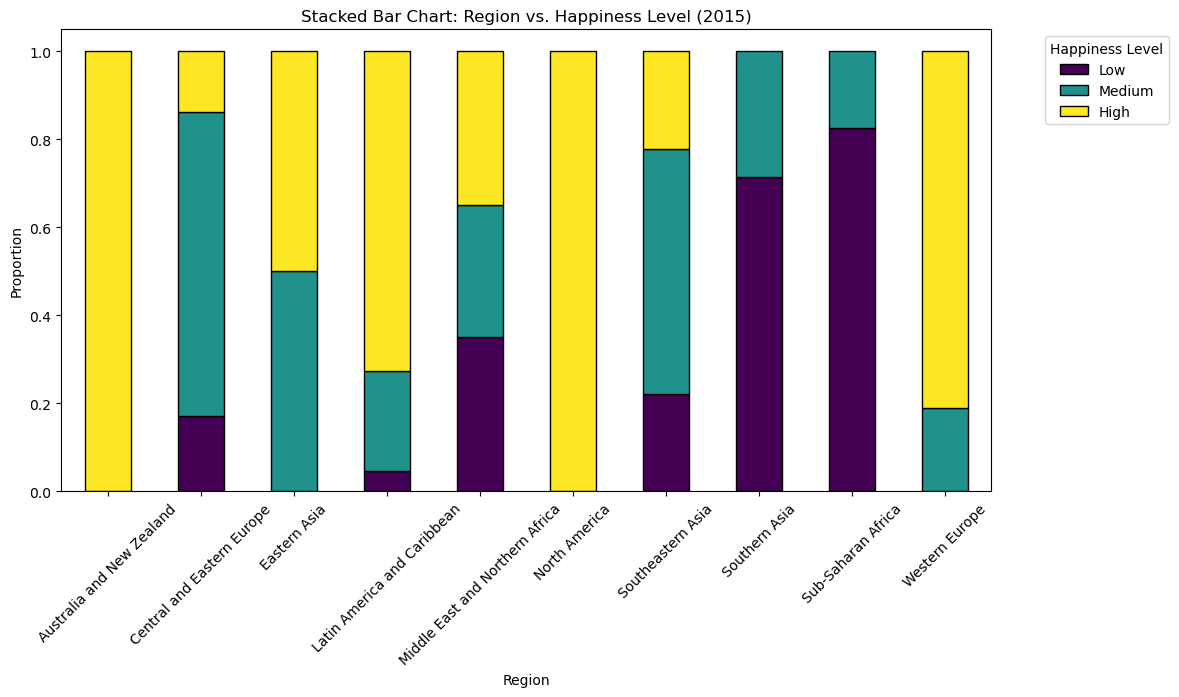

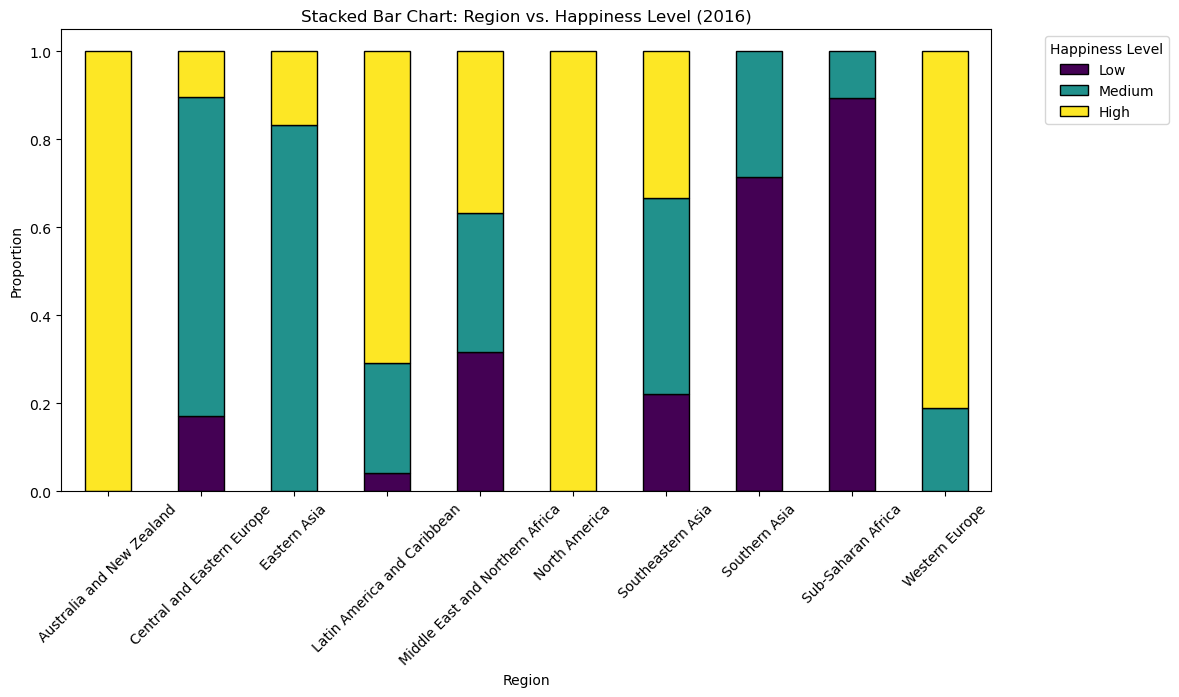

In [ ]:
def plot_stacked_bar_chart(df, category1, category2, title):
    crosstab = pd.crosstab(df[category1], df[category2], normalize="index")
    crosstab.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", edgecolor="black")
    plt.title(title)
    plt.xlabel(category1)
    plt.ylabel("Proportion")
    plt.legend(title=category2, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xticks(rotation=45)
    plt.show()

df_2015["Happiness Level"] = pd.qcut(df_2015["Happiness Score"], q=3, labels=["Low", "Medium", "High"])
plot_stacked_bar_chart(df_2015, "Region", "Happiness Level", "Stacked Bar Chart: Region vs. Happiness Level (2015)")

df_2016["Happiness Level"] = pd.qcut(df_2016["Happiness Score"], q=3, labels=["Low", "Medium", "High"])
plot_stacked_bar_chart(df_2016, "Region", "Happiness Level", "Stacked Bar Chart: Region vs. Happiness Level (2016)")


**Categorical & numerical --> (scatter plot, histogram, box plot)**

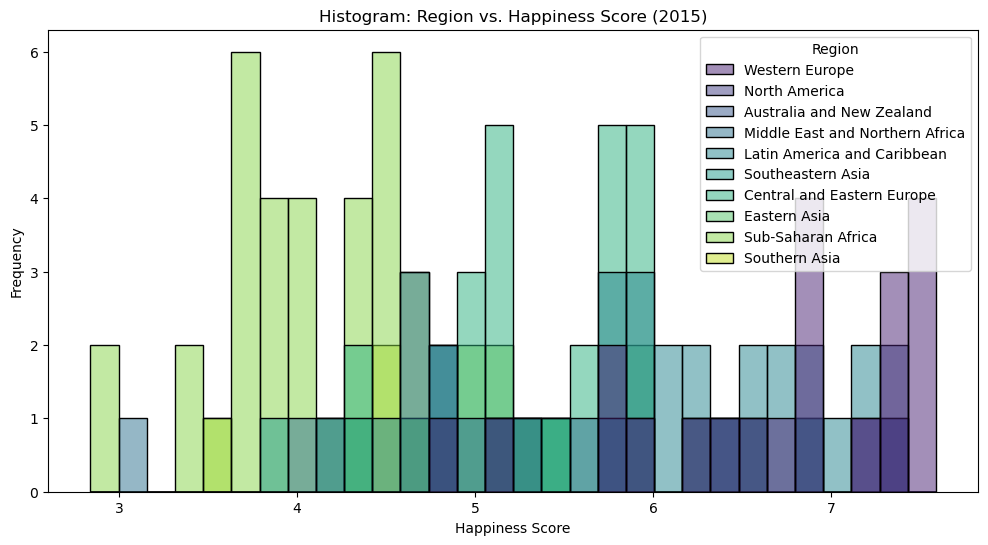

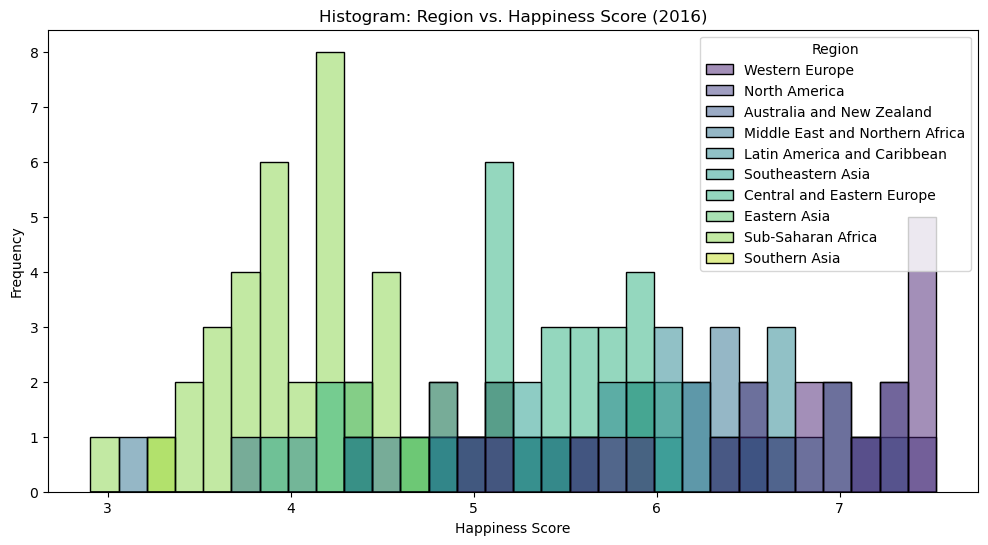

In [ ]:
def plot_histogram_categorical(df, category, numeric, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=numeric, hue=category, palette="viridis", bins=30, edgecolor="black")
    plt.title(title)
    plt.xlabel(numeric)
    plt.ylabel("Frequency")
    plt.show()

plot_histogram_categorical(df_2015, "Region", "Happiness Score", "Histogram: Region vs. Happiness Score (2015)")

plot_histogram_categorical(df_2016, "Region", "Happiness Score", "Histogram: Region vs. Happiness Score (2016)")

**numerical & numerical --> (Scatter plot, line chart)**

In [ ]:
def plot_scatter(df, x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.7, color="blue", edgecolor="black")
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

scatter_columns = {
    "2015": ("Economy (GDP per Capita)", "Happiness Score"),
    "2016": ("Economy (GDP per Capita)", "Happiness Score"),
    "2017": ("Economy (GDP per Capita)", "Happiness Score"),
    "2018": ("Economy (GDP per Capita)", "Happiness Score"),
    "2019": ("Economy (GDP per Capita)", "Happiness Score"),
}



We could also use a correlation matrix to get more specific information about the relationship between these two variables.

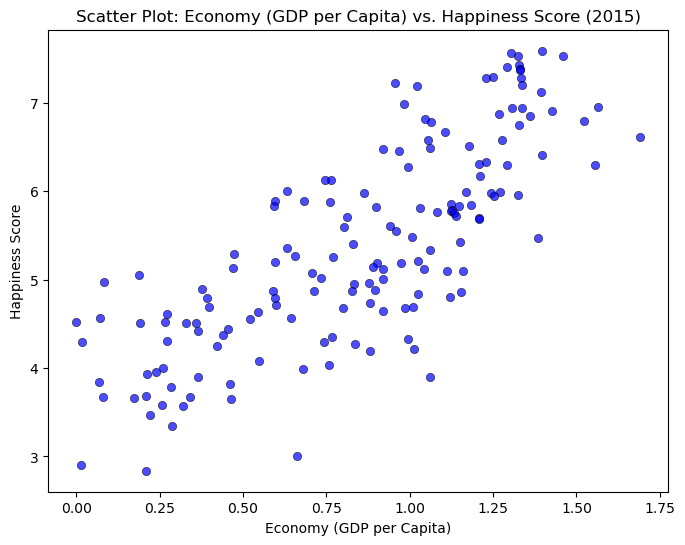

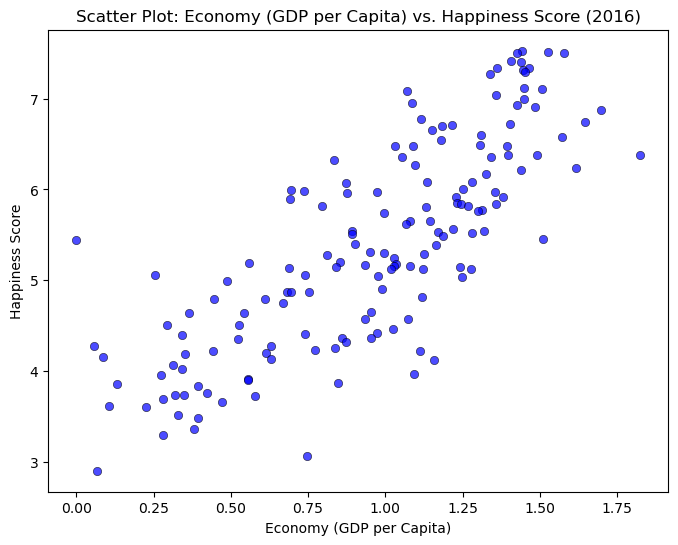

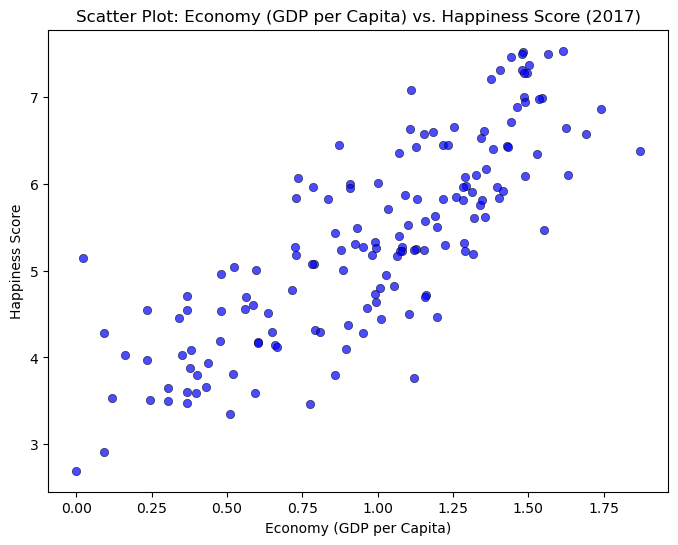

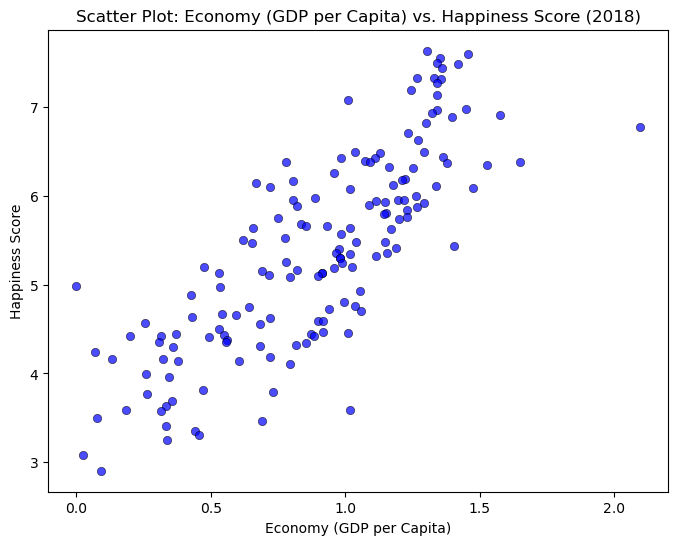

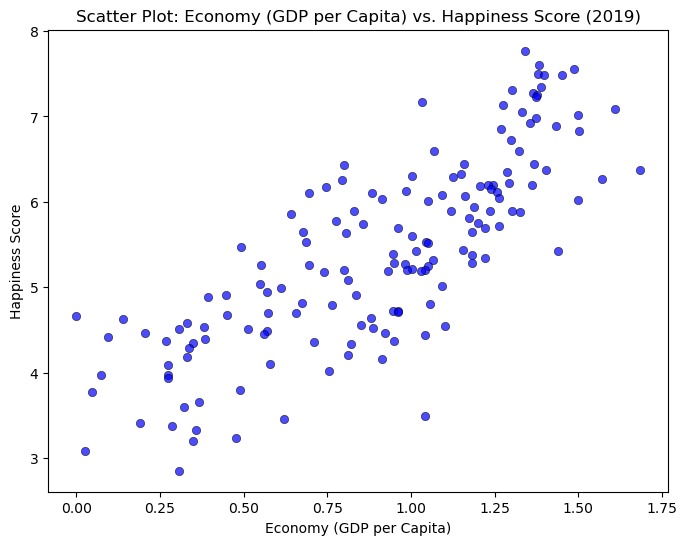

In [ ]:
# Scatter Plots for each year
for year, (x_col, y_col) in scatter_columns.items():
    df = eval(f"df_{year}")  # Get the correct dataframe
    if x_col in df.columns and y_col in df.columns:
        plot_scatter(df, x_col, y_col, f"Scatter Plot: {x_col} vs. {y_col} ({year})")

# Problem Statement

### 1- What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?


In [ ]:
factors_by_year = {
        "2015": ["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", 
                 "Freedom", "Trust (Government Corruption)", "Generosity"],
        "2016": ["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", 
                 "Freedom", "Trust (Government Corruption)", "Generosity"],
        "2017": ["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", 
                 "Freedom", "Trust (Government Corruption)", "Generosity"],
        "2018": ["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", 
                 "Freedom", "Trust (Government Corruption)", "Generosity"],
        "2019": ["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", 
                 "Freedom", "Trust (Government Corruption)", "Generosity"]
    }

def get_top_countries_by_factor(df):
    all_years_data = []

    for year, df in dfs.items():
        factors = factors_by_year.get(year, [])
        
        top_countries = {"Year": year}

        for factor in factors:
            # Find the country with the max value for the factor
            country = df[df[factor] == df[factor].max()]["Country"].values[0]  # Extract single value
            top_countries[factor] = country

        all_years_data.append(top_countries)

    result_df = pd.DataFrame(all_years_data)

    return result_df


dfs = {
    "2015": df_2015,
    "2016": df_2016,
    "2017": df_2017,
    "2018": df_2018,
    "2019": df_2019
}

get_top_countries_by_factor(dfs)


,Year,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Switzerland,Qatar,Iceland,Singapore,Norway,Rwanda,Myanmar
1,2016,Denmark,Qatar,Iceland,Hong Kong,Uzbekistan,Rwanda,Myanmar
2,2017,Norway,Qatar,Iceland,Singapore,Uzbekistan,Singapore,Myanmar
3,2018,Finland,United Arab Emirates,Iceland,Hong Kong,Uzbekistan,Singapore,Myanmar
4,2019,Finland,Qatar,Iceland,Singapore,Uzbekistan,Singapore,Myanmar


In [ ]:
# here we can see that the countries that have higher values for each factor in each year

### 2- How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_83229/4019431623.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_df["Year Range"], y=summary_df["Average Score Change"], palette="coolwarm")


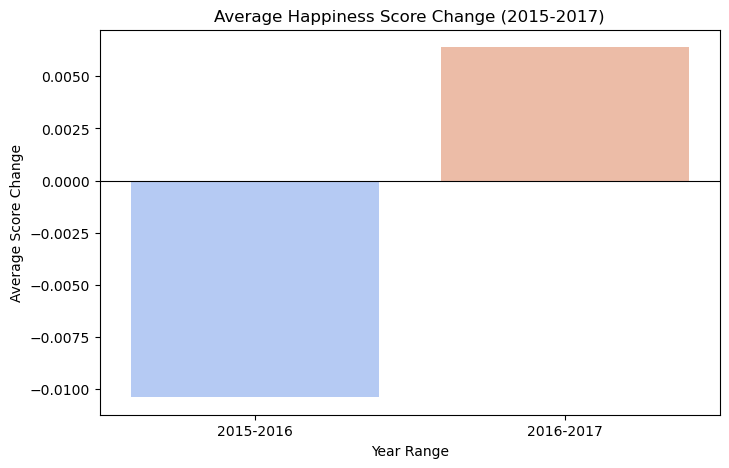

In [ ]:

# Merging 
df_15_16 = df_2015.merge(df_2016, on="Country", suffixes=("_2015", "_2016"))
df_16_17 = df_2016.merge(df_2017, on="Country", suffixes=("_2016", "_2017"))

# Calculating score changes
df_15_16["Score_Change"] = df_15_16["Happiness Score_2016"] - df_15_16["Happiness Score_2015"]
df_16_17["Score_Change"] = df_16_17["Happiness Score_2017"] - df_16_17["Happiness Score_2016"]

# Calculating the average happiness score change for each period
average_score_change_15_16 = df_15_16["Score_Change"].mean()
average_score_change_16_17 = df_16_17["Score_Change"].mean()

summary_df = pd.DataFrame({
    "Year Range": ["2015-2016", "2016-2017"],
    "Average Score Change": [average_score_change_15_16, average_score_change_16_17]
})

# Plotting only the average score changes
plt.figure(figsize=(8, 5))
sns.barplot(x=summary_df["Year Range"], y=summary_df["Average Score Change"], palette="coolwarm")

plt.ylabel("Average Score Change")
plt.xlabel("Year Range")
plt.title("Average Happiness Score Change (2015-2017)")
plt.axhline(0, color='black', linewidth=0.8)  

plt.show()


In [ ]:
# we can see that the average score change for the 2015 - 2016 was not improved but for the 2016 - 2017 was improved 

### 3- Did any country experience a significant increase or decrease in happiness?

In [ ]:
top_n = 5

top_increase_15_16 = df_15_16.nlargest(top_n, "Score_Change")[["Country", "Score_Change"]]
top_decrease_15_16 = df_15_16.nsmallest(top_n, "Score_Change")[["Country", "Score_Change"]]

top_increase_16_17 = df_16_17.nlargest(top_n, "Score_Change")[["Country", "Score_Change"]]
top_decrease_16_17 = df_16_17.nsmallest(top_n, "Score_Change")[["Country", "Score_Change"]]



In [ ]:
top_increase_15_16

,Country,Score_Change
66,Algeria,0.750
150,Togo,0.464
87,Latvia,0.462
84,Romania,0.404
98,Hungary,0.345


In [ ]:
top_decrease_15_16

,Country,Score_Change
110,Liberia,-0.949
21,Venezuela,-0.726
113,Haiti,-0.490
109,Zimbabwe,-0.417
112,Sudan,-0.411


In [ ]:
top_increase_16_17

,Country,Score_Change
122,Bulgaria,0.497
146,Afghanistan,0.434
148,Syria,0.393
113,Egypt,0.373
109,South Africa,0.370


In [ ]:
top_decrease_16_17

,Country,Score_Change
40,Venezuela,-0.834
35,Algeria,-0.483
129,Haiti,-0.425
124,Zimbabwe,-0.318
141,Tanzania,-0.317


In [ ]:
# we can notice the big increase was Algeria with score change  0.750 from 2015 to 2016